In [43]:
import numpy as np
import pandas as pd
from constants import SHARED_RANDOM_STATE
from db_helper_functions import (
    get_stock_news_with_finbert_scores_from_db,
    get_stock_news_with_finbert_tone_scores_from_db,
    get_stock_news_with_finbert_whole_article_scores_from_db,
    get_stock_news_with_finbert_tone_whole_article_scores_from_db,
    get_stock_news_with_bertopic_sentiment_scores_from_db,
)
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from supervised_learning_data_preprocessing_functions import (
    gen_df_for_supervised_learning,
)
from grid_model_search_functions import iterative_grid_cv_model_testing
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

ticker = "AAPL"

In [44]:
# finbert_summary_sentiment_df = gen_df_for_supervised_learning(
#     ticker=ticker,
#     sentiment_df_retrieval_function=get_stock_news_with_finbert_scores_from_db,
# )
# finbert_tone_summary_sentiment_df = gen_df_for_supervised_learning(
#     ticker=ticker,
#     sentiment_df_retrieval_function=get_stock_news_with_finbert_tone_scores_from_db,
# )
# finbert_whole_article_sentiment_df = gen_df_for_supervised_learning(
#     ticker=ticker,
#     sentiment_df_retrieval_function=get_stock_news_with_finbert_whole_article_scores_from_db,
# )
# finbert_tone_article_sentiment_df = gen_df_for_supervised_learning(
#     ticker=ticker,
#     sentiment_df_retrieval_function=get_stock_news_with_finbert_tone_whole_article_scores_from_db,
# )
bert_topic_article_sentiment_df = gen_df_for_supervised_learning(
    ticker=ticker,
    sentiment_df_retrieval_function=get_stock_news_with_bertopic_sentiment_scores_from_db,
)

/Users/raulmartinez/Desktop/MADS/Milestone_2/w24-milestone2-team18-leevw-steveso-raulmart/.venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [45]:
dataframes_to_test = [
    # (finbert_summary_sentiment_df, "finbert_summary_sentiment_df"),
    # (finbert_tone_summary_sentiment_df, "finbert_tone_summary_sentiment_df"),
    # (finbert_whole_article_sentiment_df, "finbert_whole_article_sentiment_df"),
    # (finbert_tone_article_sentiment_df, "finbert_tone_whole_article_sentiment_df"),
    (bert_topic_article_sentiment_df, "bert_topic_article_sentiment_df"),
]
# total_len = len(bert_topic_article_sentiment_df) * 0.25
cv_train_size = [126]
cv_test_size = [31]
lag_time = [5]
tss_splits = 5
features_to_use = [
    "open",
    "prev_high",
    "prev_low",
    "prev_close",
    "positive",
    "negative",
    "neutral",
    # "prev_volume",
    # "dividends",
    # "stock_splits",
    # "day_of_month",
    # "day_of_week",
    # "quarter",
    # "month",
    # "year",
]

# feature_to_predict = ["close"]
feature_to_predict = ["closed_higher"]
# scoring_method = ["neg_mean_absolute_error"]
scoring_method = ["accuracy"]

param_grid = {
    "data_frame": dataframes_to_test,
    "cv_train_size": cv_train_size,
    "cv_test_size": cv_test_size,
    "lag_time": lag_time,
    "feature_to_predict": feature_to_predict,
    "scoring_method": scoring_method,
}
data_settings_grid_list = list(ParameterGrid(param_grid))

In [46]:
# knn_results = iterative_grid_cv_model_testing(
#     model=KNeighborsRegressor(),
#     model_parameters={"n_neighbors": [2, 3, 4, 5]},
#     data_settings_grid_list=data_settings_grid_list,
#     features_to_use=features_to_use,
# )

In [47]:
# print(len(knn_results))
# knn_results = knn_results.sort_values("mean_test_score", ascending=False)
# knn_results.head()

In [48]:
# knn_results.to_csv("./knn_regression_results.csv")

In [49]:
# gbr_results = iterative_grid_cv_model_testing(
#     model=GradientBoostingRegressor(),
#     model_parameters={
#         "random_state": [SHARED_RANDOM_STATE],
#         "learning_rate": [0.01, 0.1],
#         "n_estimators": [10, 20, 100],
#         "max_depth": [None, 2, 5],
#         "max_leaf_nodes": [None, 5, 10],
#     },
#     data_settings_grid_list=data_settings_grid_list,
#     features_to_use=features_to_use,
# )

In [50]:
# print(len(gbr_results))
# gbr_results = gbr_results.sort_values("mean_test_score", ascending=False)
# gbr_results.head()

In [51]:
# gbr_results.to_csv("./model_results/gb_regression_results.csv")

In [52]:
# rf_results = iterative_grid_cv_model_testing(
#     model=RandomForestRegressor(),
#     model_parameters={
#         "random_state": [SHARED_RANDOM_STATE],
#         "n_estimators": [10, 20, 100],
#         "max_depth": [None, 2, 5],
#         "max_leaf_nodes": [None, 5, 10],
#     },
#     data_settings_grid_list=data_settings_grid_list,
#     features_to_use=features_to_use,
# )

In [53]:
# rf_results.to_csv("./model_results/rf_regression_results.csv")

In [54]:
# rf_results = rf_results.sort_values("mean_test_score", ascending=False)
# rf_results.head()

In [55]:
# lin_reg_results = iterative_grid_cv_model_testing(
#     model=LinearRegression(),
#     model_parameters={},
#     data_settings_grid_list=data_settings_grid_list,
#     features_to_use=features_to_use,
# )

In [56]:
# print(len(lin_reg_results))
# lin_reg_results = lin_reg_results.sort_values("mean_test_score", ascending=False)
# lin_reg_results.head()

In [57]:
# lin_reg_results.to_csv("./model_results/linear_regression_results.csv")

In [58]:
# param_grid = {
#     "data_frame": dataframes_to_test,
#     "cv_train_size": cv_train_size,
#     "cv_test_size": cv_test_size,
#     "lag_time": lag_time,
#     "feature_to_predict": feature_to_predict,
#     "scoring_method": scoring_method,
# }
# data_settings_grid_list = list(ParameterGrid(param_grid))

In [59]:
log_reg_clf_results = iterative_grid_cv_model_testing(
    model=LogisticRegression(),
    model_parameters={
        "random_state": [SHARED_RANDOM_STATE],
    },
    data_settings_grid_list=data_settings_grid_list,
    features_to_use=features_to_use,
    tss_splits=tss_splits,
)

In [60]:
log_reg_clf_results = log_reg_clf_results.sort_values(
    "mean_test_score", ascending=False
)
log_reg_clf_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,data_frame,cv_train_size,cv_test_size,lag_time,scoring_method,features_to_use
0,0.002473,0.000331,0.000716,0.000041,1337,{'model__random_state': 1337},0.548387,0.548387,0.548387,0.354839,0.516129,0.503226,0.075238,1,bert_topic_article_sentiment_df,126,31,5,accuracy,"open,prev_high,prev_low,prev_close,positive,ne..."


In [61]:
log_reg_clf_results.to_csv("./model_results/logistic_regression_classifier_results.csv")

In [62]:
gb_clf_results = iterative_grid_cv_model_testing(
    model=GradientBoostingClassifier(),
    model_parameters={
        "random_state": [SHARED_RANDOM_STATE],
        "learning_rate": [0.1, 0.2, 0.3, 0.4],
        "n_estimators": [5, 10, 20, 100],
        "max_depth": [None, 2, 5, 10, 15, 20],
        "max_leaf_nodes": [None, 2, 5, 10, 15, 20],
    },
    data_settings_grid_list=data_settings_grid_list,
    features_to_use=features_to_use,
    tss_splits=tss_splits,
)

In [63]:
gb_clf_results = gb_clf_results.sort_values("mean_test_score", ascending=False)
gb_clf_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_depth,param_model__max_leaf_nodes,param_model__n_estimators,param_model__random_state,params,...,split4_test_score,mean_test_score,std_test_score,rank_test_score,data_frame,cv_train_size,cv_test_size,lag_time,scoring_method,features_to_use
482,0.021846,0.005818,0.001799,0.001276,0.4,5,None,20,1337,"{'model__learning_rate': 0.4, 'model__max_dept...",...,0.677419,0.625806,0.126754,1,bert_topic_article_sentiment_df,126,31,5,accuracy,"open,prev_high,prev_low,prev_close,positive,ne..."
207,0.059822,0.006419,0.000998,0.000160,0.2,5,10,100,1337,"{'model__learning_rate': 0.2, 'model__max_dept...",...,0.645161,0.619355,0.089861,2,bert_topic_article_sentiment_df,126,31,5,accuracy,"open,prev_high,prev_low,prev_close,positive,ne..."
71,0.083919,0.015264,0.001555,0.001147,0.1,5,20,100,1337,"{'model__learning_rate': 0.1, 'model__max_dept...",...,0.612903,0.612903,0.064516,3,bert_topic_article_sentiment_df,126,31,5,accuracy,"open,prev_high,prev_low,prev_close,positive,ne..."
135,0.070606,0.009021,0.001331,0.000745,0.1,20,10,100,1337,"{'model__learning_rate': 0.1, 'model__max_dept...",...,0.580645,0.606452,0.119660,4,bert_topic_article_sentiment_df,126,31,5,accuracy,"open,prev_high,prev_low,prev_close,positive,ne..."
87,0.074390,0.009175,0.001308,0.000586,0.1,10,10,100,1337,"{'model__learning_rate': 0.1, 'model__max_dept...",...,0.580645,0.606452,0.119660,4,bert_topic_article_sentiment_df,126,31,5,accuracy,"open,prev_high,prev_low,prev_close,positive,ne..."


In [64]:
gb_clf_results.to_csv("./model_results/gb_classifier_results.csv")

In [65]:
rf_clf_results = iterative_grid_cv_model_testing(
    model=RandomForestClassifier(),
    model_parameters={
        "random_state": [SHARED_RANDOM_STATE],
        "n_estimators": [4, 5, 10, 15, 20, 50, 100],
        "max_depth": [None, 2, 5, 10, 15, 20],
        "max_leaf_nodes": [None, 2, 5, 10, 15, 20],
    },
    data_settings_grid_list=data_settings_grid_list,
    features_to_use=features_to_use,
    tss_splits=tss_splits,
)

In [66]:
rf_clf_results = rf_clf_results.sort_values("mean_test_score", ascending=False)
rf_clf_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__max_leaf_nodes,param_model__n_estimators,param_model__random_state,params,split0_test_score,...,split4_test_score,mean_test_score,std_test_score,rank_test_score,data_frame,cv_train_size,cv_test_size,lag_time,scoring_method,features_to_use
124,0.031332,0.009466,0.001712,0.000503,5,20,50,1337,"{'model__max_depth': 5, 'model__max_leaf_nodes...",0.516129,...,0.580645,0.580645,0.045620,1,bert_topic_article_sentiment_df,126,31,5,accuracy,"open,prev_high,prev_low,prev_close,positive,ne..."
118,0.058602,0.009733,0.002131,0.000062,5,15,100,1337,"{'model__max_depth': 5, 'model__max_leaf_nodes...",0.548387,...,0.580645,0.574194,0.042795,2,bert_topic_article_sentiment_df,126,31,5,accuracy,"open,prev_high,prev_low,prev_close,positive,ne..."
125,0.057055,0.010203,0.002064,0.000022,5,20,100,1337,"{'model__max_depth': 5, 'model__max_leaf_nodes...",0.516129,...,0.580645,0.574194,0.031606,2,bert_topic_article_sentiment_df,126,31,5,accuracy,"open,prev_high,prev_low,prev_close,positive,ne..."
90,0.048368,0.005056,0.002042,0.000029,5,None,100,1337,"{'model__max_depth': 5, 'model__max_leaf_nodes...",0.548387,...,0.580645,0.567742,0.032897,4,bert_topic_article_sentiment_df,126,31,5,accuracy,"open,prev_high,prev_low,prev_close,positive,ne..."
117,0.028996,0.007156,0.001791,0.000504,5,15,50,1337,"{'model__max_depth': 5, 'model__max_leaf_nodes...",0.516129,...,0.580645,0.561290,0.038710,5,bert_topic_article_sentiment_df,126,31,5,accuracy,"open,prev_high,prev_low,prev_close,positive,ne..."


In [67]:
rf_clf_results.to_csv("./model_results/rf_classifier_results.csv")

In [68]:
knn_clf_results = iterative_grid_cv_model_testing(
    model=KNeighborsClassifier(),
    model_parameters={
        "n_neighbors": [2, 3, 4, 5, 15, 20],
    },
    data_settings_grid_list=data_settings_grid_list,
    features_to_use=features_to_use,
    tss_splits=tss_splits,
)

In [69]:
knn_clf_results = knn_clf_results.sort_values("mean_test_score", ascending=False)
knn_clf_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,data_frame,cv_train_size,cv_test_size,lag_time,scoring_method,features_to_use
5,0.001358,0.000081,0.001481,0.000054,20,{'model__n_neighbors': 20},0.548387,0.451613,0.580645,0.548387,0.612903,0.548387,0.053978,1,bert_topic_article_sentiment_df,126,31,5,accuracy,"open,prev_high,prev_low,prev_close,positive,ne..."
1,0.001347,0.000105,0.001457,0.000091,3,{'model__n_neighbors': 3},0.548387,0.451613,0.516129,0.548387,0.645161,0.541935,0.062551,2,bert_topic_article_sentiment_df,126,31,5,accuracy,"open,prev_high,prev_low,prev_close,positive,ne..."
4,0.001432,0.000171,0.001607,0.000159,15,{'model__n_neighbors': 15},0.548387,0.548387,0.483871,0.483871,0.612903,0.535484,0.048279,3,bert_topic_article_sentiment_df,126,31,5,accuracy,"open,prev_high,prev_low,prev_close,positive,ne..."
0,0.001487,0.000112,0.001616,0.000054,2,{'model__n_neighbors': 2},0.548387,0.354839,0.483871,0.516129,0.580645,0.496774,0.077955,4,bert_topic_article_sentiment_df,126,31,5,accuracy,"open,prev_high,prev_low,prev_close,positive,ne..."
3,0.001283,0.000117,0.001468,0.000103,5,{'model__n_neighbors': 5},0.548387,0.548387,0.290323,0.516129,0.516129,0.483871,0.097844,5,bert_topic_article_sentiment_df,126,31,5,accuracy,"open,prev_high,prev_low,prev_close,positive,ne..."


### Total Models Tested


In [70]:
(
    len(knn_clf_results)
    + len(gb_clf_results)
    + len(rf_clf_results)
    + len(log_reg_clf_results)
)

835

### Model Results


In [71]:
for df, name in [
    (log_reg_clf_results, "log_reg_clf_results"),
    (knn_clf_results, "knn_clf_results"),
    (rf_clf_results, "rf_clf_results"),
    (gb_clf_results, "gb_clf_results"),
]:
    print(name)
    print(round(df.iloc[0].mean_test_score, 5))
    print(round(df.iloc[0].std_test_score, 5))
    print("#####")

log_reg_clf_results
0.50323
0.07524
#####
knn_clf_results
0.54839
0.05398
#####
rf_clf_results
0.58065
0.04562
#####
gb_clf_results
0.62581
0.12675
#####


In [72]:
def grid_cv_test_model(
    model,
    model_parameters,
    data_frame,
    features_to_use,
    feature_to_predict,
    scoring_method,
    cv_train_size,
    cv_test_size,
    lag_time,
    num_tss_splits,
):

    steps = [("scaler", MinMaxScaler((-1, 1))), ("model", model)]
    std_parms = {f"model__{k}": v for k, v in model_parameters.items()}

    pipeline = Pipeline(steps)

    X = data_frame[features_to_use]
    y = data_frame[feature_to_predict]

    tss_splits = TimeSeriesSplit(
        n_splits=num_tss_splits,
        max_train_size=cv_train_size,
        test_size=cv_test_size,
        gap=lag_time,
    ).split(X)

    grid_search_cv_model = GridSearchCV(
        pipeline,
        param_grid=std_parms,
        scoring=scoring_method,
        cv=tss_splits,
        n_jobs=-1,
    )

    grid_search_cv_model.fit(X, y)
    return grid_search_cv_model

In [73]:
gbc = GradientBoostingClassifier()
params = {k[7:]: [v] for k, v in gb_clf_results.iloc[0].params.items()}

features_to_use = [
    "open",
    "prev_high",
    "prev_low",
    "prev_close",
    "positive",
    "negative",
    "neutral",
]

best_model = grid_cv_test_model(
    model=gbc,
    model_parameters=params,
    data_frame=bert_topic_article_sentiment_df,
    features_to_use=features_to_use,
    feature_to_predict=feature_to_predict[0],
    scoring_method=scoring_method[0],
    cv_train_size=cv_train_size[0],
    cv_test_size=cv_test_size[0],
    lag_time=lag_time[0],
    num_tss_splits=tss_splits,
)

### Feature Importance Analysis


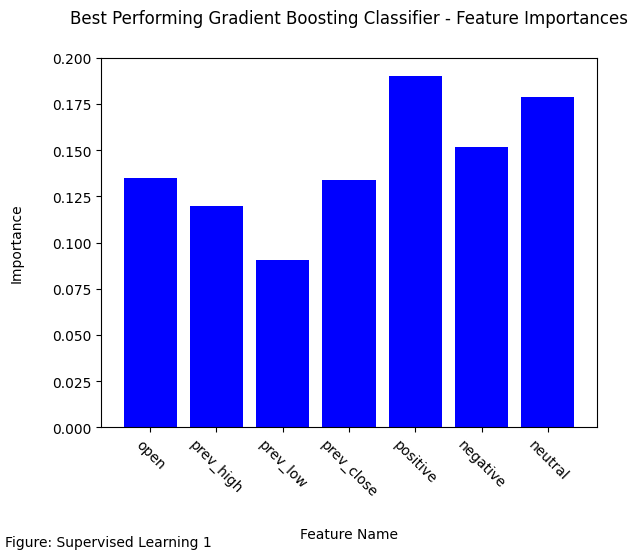

[('open', 0.1349021915368097), ('prev_high', 0.11972562623022805), ('prev_low', 0.09059025751128989), ('prev_close', 0.1336989832511357), ('positive', 0.19020075386067248), ('negative', 0.15191971746674438), ('neutral', 0.1789624701431198)]


In [74]:
features_and_importances = list(
    zip(
        best_model.best_estimator_[0].feature_names_in_,
        best_model.best_estimator_[1].feature_importances_,
    )
)

plt.figure()
plt.bar(
    best_model.best_estimator_[0].feature_names_in_,
    best_model.best_estimator_[1].feature_importances_,
    color="b",
)

plt.title("Best Performing Gradient Boosting Classifier - Feature Importances", pad=25)
plt.xlabel("Feature Name", labelpad=20)
plt.tick_params(axis="x", rotation=-45)

plt.ylabel("Importance", labelpad=20)
plt.ylim((0, 0.20))
plt.annotate("Figure: Supervised Learning 1", xy=(5, 5), xycoords="figure pixels")
plt.show()
print(features_and_importances)

### Feature Ablation Analysis


In [75]:
all_features = [
    "open",
    "prev_high",
    "prev_low",
    "prev_close",
    "positive",
    "negative",
    "neutral",
]

only_stock_data = [
    "open",
    "prev_high",
    "prev_low",
    "prev_close",
]

only_sentiment_data = [
    "positive",
    "negative",
    "neutral",
]


polarizing = [
    "open",
    "positive",
    "negative",
]

removing_lowest = [
    "open",
    "prev_high",
    "prev_close",
    "positive",
    "negative",
    "neutral",
]


for feats in [
    (all_features, "all_features"),
    (only_sentiment_data, "only_sentiment_data"),
    (only_stock_data, "only_stock_data"),
    (polarizing, "polarizing"),
    (removing_lowest, "removing_lowest"),
]:
    gbc = GradientBoostingClassifier()
    params = {k[7:]: [v] for k, v in gb_clf_results.iloc[0].params.items()}

    best_model = grid_cv_test_model(
        model=gbc,
        model_parameters=params,
        data_frame=bert_topic_article_sentiment_df,
        features_to_use=feats[0],
        feature_to_predict=feature_to_predict[0],
        scoring_method=scoring_method[0],
        cv_train_size=cv_train_size[0],
        cv_test_size=cv_test_size[0],
        lag_time=lag_time[0],
        num_tss_splits=tss_splits,
    )

    df = pd.DataFrame(best_model.cv_results_).sort_values(
        "mean_test_score", ascending=False
    )
    print(feats[1])
    print(round(df.iloc[0].mean_test_score, 5))
    print(round(df.iloc[0].std_test_score, 5))
    print("########")

all_features
0.62581
0.12675
########
only_sentiment_data
0.47097
0.05624
########
only_stock_data
0.54839
0.10201
########
polarizing
0.57419
0.10872
########
removing_lowest
0.58065
0.07356
########


### HyperParameter Sensitivity Analysis on Best Performing Model


In [76]:
len(gb_clf_results)

576

In [77]:
gb_clf_results.tail()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_depth,param_model__max_leaf_nodes,param_model__n_estimators,param_model__random_state,params,...,split4_test_score,mean_test_score,std_test_score,rank_test_score,data_frame,cv_train_size,cv_test_size,lag_time,scoring_method,features_to_use
79,0.051079,0.007392,0.000888,0.000028,0.1,10,2,100,1337,"{'model__learning_rate': 0.1, 'model__max_dept...",...,0.483871,0.464516,0.03871,571,bert_topic_article_sentiment_df,126,31,5,accuracy,"open,prev_high,prev_low,prev_close,positive,ne..."
103,0.042865,0.010788,0.001332,0.000807,0.1,15,2,100,1337,"{'model__learning_rate': 0.1, 'model__max_dept...",...,0.483871,0.464516,0.03871,571,bert_topic_article_sentiment_df,126,31,5,accuracy,"open,prev_high,prev_low,prev_close,positive,ne..."
127,0.032746,0.002757,0.000895,0.000035,0.1,20,2,100,1337,"{'model__learning_rate': 0.1, 'model__max_dept...",...,0.483871,0.464516,0.03871,571,bert_topic_article_sentiment_df,126,31,5,accuracy,"open,prev_high,prev_low,prev_close,positive,ne..."
31,0.045035,0.013717,0.001890,0.001938,0.1,2,2,100,1337,"{'model__learning_rate': 0.1, 'model__max_dept...",...,0.483871,0.464516,0.03871,571,bert_topic_article_sentiment_df,126,31,5,accuracy,"open,prev_high,prev_low,prev_close,positive,ne..."
7,0.042031,0.005671,0.000946,0.000040,0.1,None,2,100,1337,"{'model__learning_rate': 0.1, 'model__max_dept...",...,0.483871,0.464516,0.03871,571,bert_topic_article_sentiment_df,126,31,5,accuracy,"open,prev_high,prev_low,prev_close,positive,ne..."


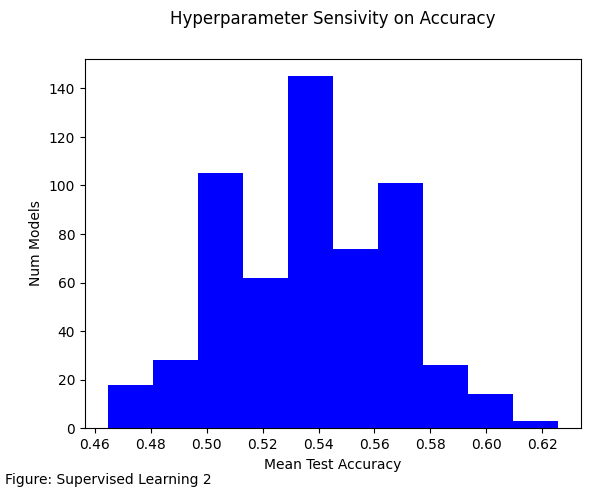

In [78]:
plt.figure()
plt.hist(
    gb_clf_results["mean_test_score"],
    color="b",
)

plt.title("Hyperparameter Sensivity on Accuracy", pad=25)
plt.xlabel("Mean Test Accuracy")
plt.ylabel("Num Models")
plt.annotate("Figure: Supervised Learning 2", xy=(5, 5), xycoords="figure pixels")
plt.show()

### Tradeoff Analysis


In [79]:
gb_clf_results.iloc[0].mean_fit_time / log_reg_clf_results.iloc[0].mean_fit_time

8.834262133862975

### Failure Analysis
